### Question 6 [10 points]

Reproduce one of the images in Figure 3.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from pathlib import Path

# Small style adjustments for more readable plots
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14

/tmp/ipykernel_35121/187724789.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


/tmp/ipykernel_10343/187724789.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec

import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

In [3]:
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")

## Recreating figure f (Montery Bay, 1 km offshore)

In [61]:
import numpy as np

## montery bay coordinates
latm=36.84
longm=-121.92

## calculate degree for 1km offshore
offshore_deg = 1 / (6400 * np.cos(latm * np.pi / 180))
offshore_long=longm-offshore_deg*180/np.pi
offshore_long

-121.93118620563402

In [75]:
## get all the data corresponding to the latitude of montery, and longitude 1 km offshore 
montery=ds.analysed_sst.sel(lat=latm,lon= offshore_long, method = 'nearest')  

In [76]:
## get rolling avg mean for 2014, 15, 16
y14 =  montery.sel(time = '2014').rolling(time = 30, center = True).mean()-273.15
y15 =  montery.sel(time = '2015').rolling(time = 30, center = True).mean()-273.15
y16 =  montery.sel(time = '2016').rolling(time = 30, center = True).mean()-273.15

In [77]:
## create a new attribute day
montery.coords['day'] = montery.time.dt.dayofyear

## get mean of each day & get rolling avg
day_means=montery.sel(time = slice('2002', '2013')).groupby('day').mean()-273.15
day_means_rolling_avg = day_means.rolling(day=30, center=True).mean()

In [78]:
## get std, min, max of each day
day_means_std = day_means.rolling(day=30, center=True).std()
day_means_min = day_means.rolling(day=30, center=True).min()
day_means_max = day_means.rolling(day=30, center=True).max()

In [79]:
## get upper and lower bound +- 1sd
lower_1sd = day_means_rolling_avg - day_means_std
upper_1sd = day_means_rolling_avg + day_means_std

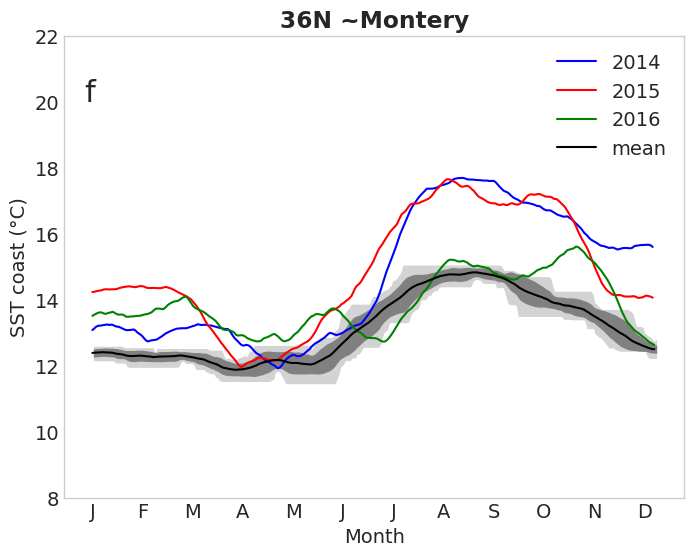

In [81]:
## plot!

fig, ax = plt.subplots(1,1) 

plt.plot(y14, color = 'blue', label = '2014')
plt.plot(y15, color = 'red', label = '2015' )
plt.plot(y16, color = 'green', label = '2016')
plt.plot(day_means_rolling_avg, color = "black", label="mean")
plt.ylim(8,22)

plt.fill_between(day_means.day.values,  day_means_min.data, day_means_max.data, color = 'lightgray')
plt.fill_between(day_means.day.values,  lower_1sd.data,  upper_1sd.data, color = 'gray')

plt.ylim(8,22)
plt.text(10, 20, 'f', fontsize = 22)

ax.set_xticks(np.arange(15, 360, 30))
ax.set_xticklabels(['J', 'F', 'M','A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
ax.grid(False)
plt.legend()

plt.title('36N ~Montery', fontweight='bold')
plt.ylabel('SST coast (°C)')
plt.xlabel('Month')

plt.show()
fig.savefig('outputs/climate-Q06.png', bbox_inches='tight')